In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import correlate2d
import matplotlib.pyplot as plt
import os

#import skfda
#from skfda.representation.interpolation import SplineInterpolation

#import skfda.representation.basis as basis

In [ ]:
new_directry="E:\\Sanjeewa (new)\\Yiled_Curve_modeling\\data_fts"

In [ ]:
os.chdir(new_directry)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Sanjeewa (new)\\Yiled_Curve_modeling\\data_fts'

In [ ]:
# Load data set
data_ori = pd.read_csv("SLYiledpy_new.csv")
data_ori

,0.25,0.5,1,2,3,4,5,6,10
0,0.077,0.086,0.093,0.107,0.114,0.120,0.119,0.121,0.121
1,0.078,0.087,0.094,0.102,0.108,0.116,0.118,0.119,0.120
2,0.080,0.088,0.094,0.102,0.110,0.116,0.117,0.118,0.120
3,0.084,0.091,0.095,0.106,0.111,0.118,0.119,0.119,0.123
4,0.083,0.090,0.093,0.097,0.096,0.100,0.103,0.103,0.111
...,...,...,...,...,...,...,...,...,...
146,0.123,0.125,0.126,0.148,0.149,0.150,0.151,0.152,0.164
147,0.121,0.121,0.124,0.132,0.145,0.148,0.149,0.151,0.155
148,0.144,0.143,0.147,0.156,0.170,0.168,0.174,0.172,0.178
149,0.197,0.203,0.212,0.204,0.209,0.221,0.224,0.227,0.238


In [ ]:
%matplotlib notebook
plt.figure(figsize=(10,8))
ax=plt.axes(projection='3d')
fg=ax.scatter3D(data_ori['0.25'],data_ori['0.5'],data_ori['1'],
               s=data_ori['0.25']*1000, c =data_ori['0.25'])
ax.set_xlabel("3 months")
ax.set_ylabel("6 months")
ax.set_zlabel("1 year")
plt.colorbar(fg)

<IPython.core.display.Javascript object>

In [ ]:
data_smooth = pd.read_csv("SLYiledpy_smooth.csv")
data_smooth

,0.25,0.5,1,2,3,4,5,6,10
0,0.0792,0.0839,0.0926,0.1062,0.1145,0.1190,0.1201,0.1207,0.1211
1,0.0800,0.0852,0.0934,0.1024,0.1083,0.1150,0.1178,0.1194,0.1198
2,0.0811,0.0867,0.0937,0.1017,0.1095,0.1163,0.1175,0.1177,0.1197
3,0.0862,0.0892,0.0949,0.1048,0.1120,0.1167,0.1191,0.1199,0.1231
4,0.0875,0.0885,0.0906,0.0942,0.0972,0.0996,0.1018,0.1037,0.1113
...,...,...,...,...,...,...,...,...,...
146,0.1217,0.1243,0.1301,0.1442,0.1495,0.1501,0.1507,0.1519,0.1637
147,0.1201,0.1216,0.1247,0.1331,0.1428,0.1477,0.1495,0.1509,0.1546
148,0.1426,0.1447,0.1489,0.1574,0.1650,0.1697,0.1724,0.1738,0.1784
149,0.1971,0.2025,0.2124,0.2041,0.2088,0.2214,0.2241,0.2265,0.2378


In [ ]:
yiled_to_mat = [0.25, 0.5, 1, 2, 3,4,5,6,10]  # yield to maturity of the curves

<IPython.core.display.Javascript object>


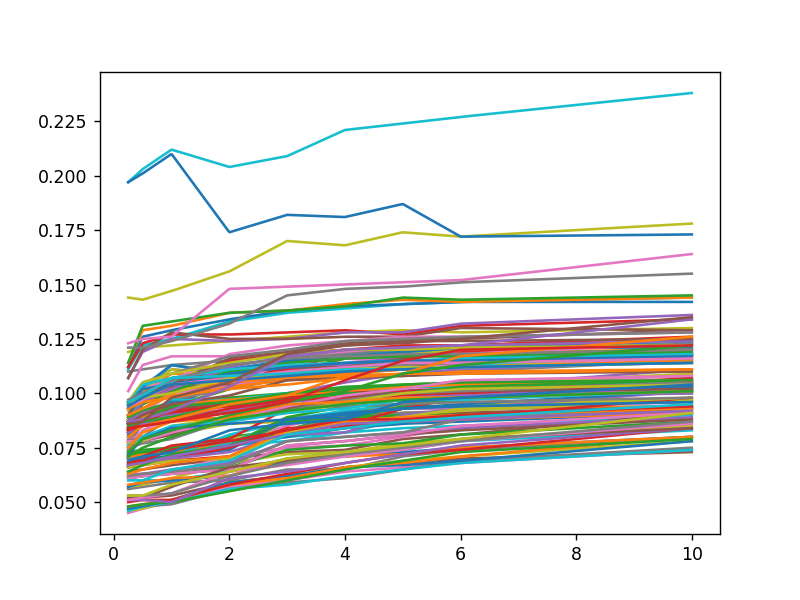

<IPython.core.display.Javascript object>


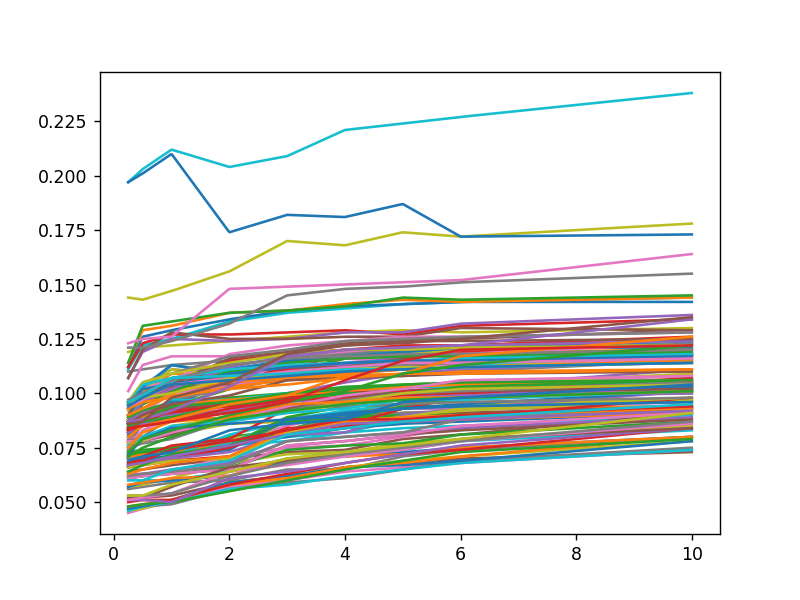

In [ ]:
# Construct the FDataGrid Represent discretised functional data.
# Class for representing functional data as a set of curves discretised in yield to maturity.
# The number of columns of data_matrix have to be the yield to maturity.
fd_ori = skfda.FDataGrid(data_ori,grid_points=yiled_to_mat)
fd_ori.plot()

<IPython.core.display.Javascript object>


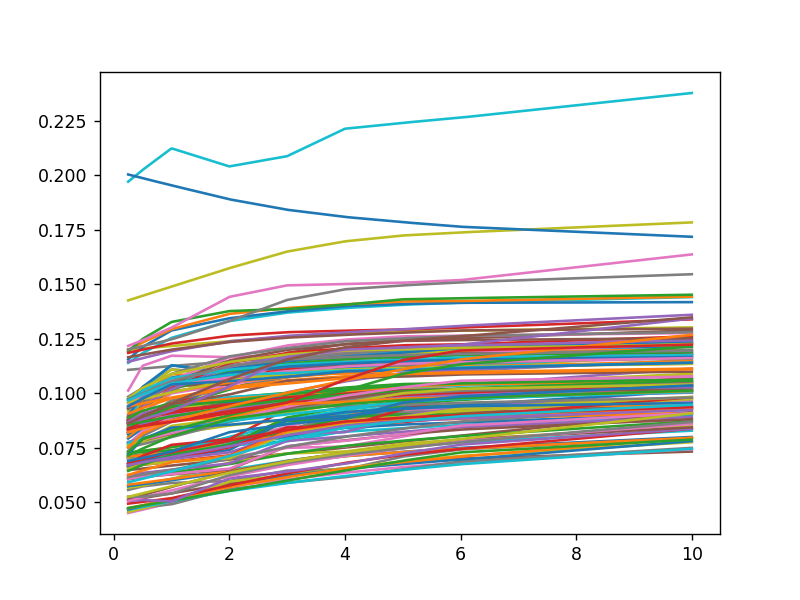

<IPython.core.display.Javascript object>


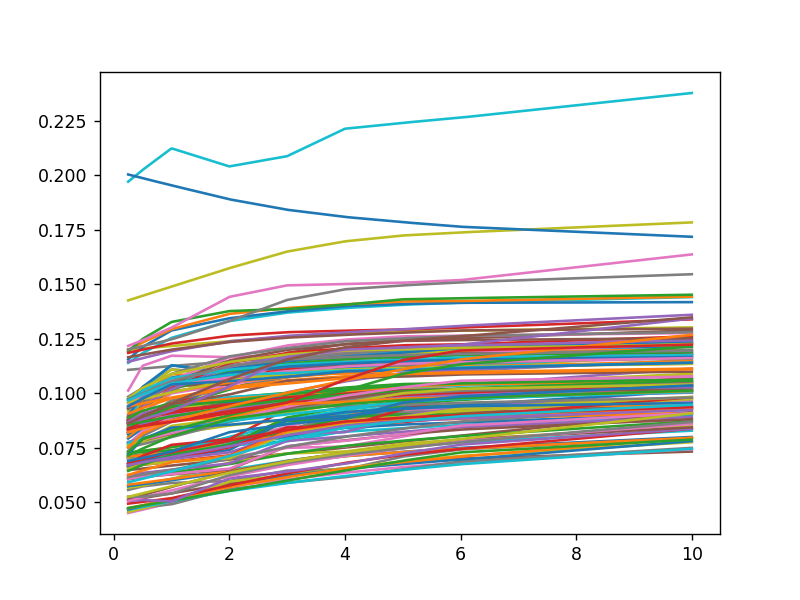

In [ ]:
fd_smooth = skfda.FDataGrid(data_smooth,grid_points=yiled_to_mat)
fd_smooth.plot()

<IPython.core.display.Javascript object>


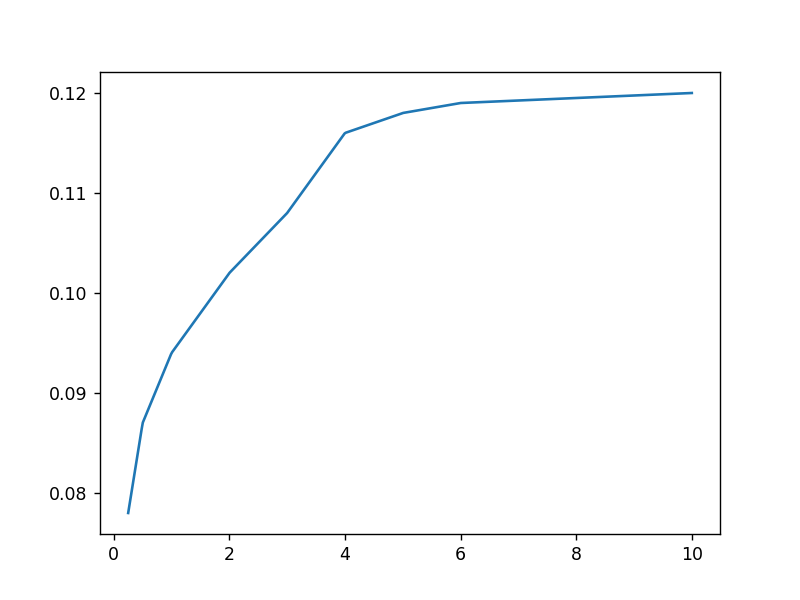

<IPython.core.display.Javascript object>


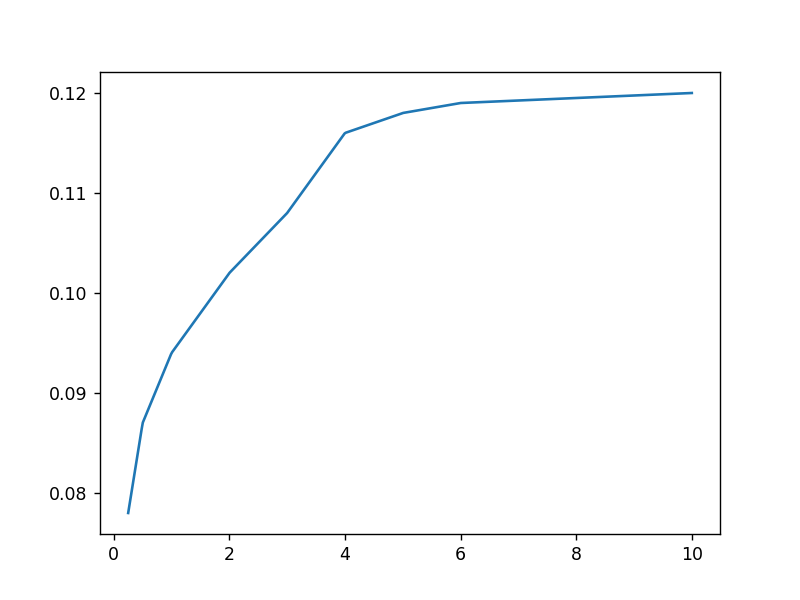

In [ ]:
fd_ori[1].plot()

<IPython.core.display.Javascript object>


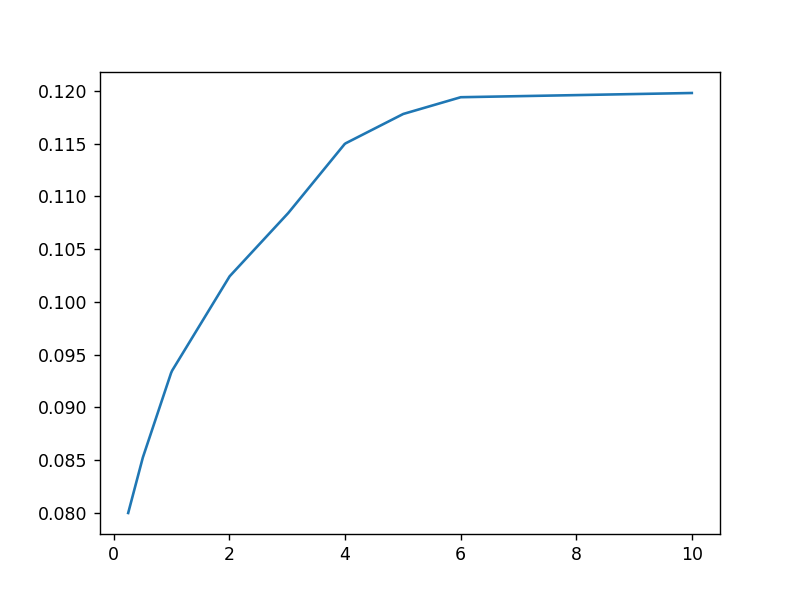

<IPython.core.display.Javascript object>


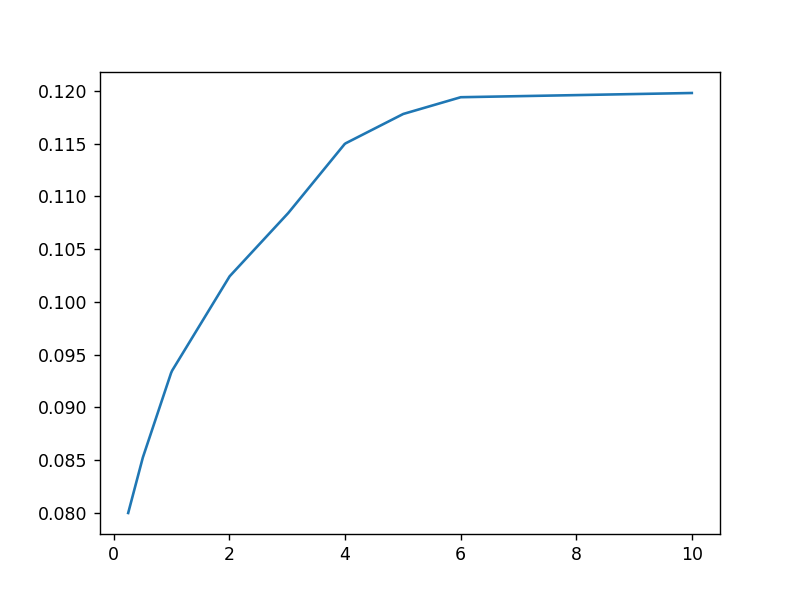

In [ ]:
fd_smooth[1].plot()

In [ ]:
print(repr(fd_smooth))

FDataGrid(
    array([[[0.0766],
            [0.0857],
            [0.0933],
            ...,
            [0.119 ],
            [0.1208],
            [0.1211]],
    
           [[0.0779],
            [0.0873],
            [0.0938],
            ...,
            [0.1175],
            [0.1194],
            [0.1198]],
    
           [[0.0803],
            [0.0878],
            [0.0935],
            ...,
            [0.1174],
            [0.1177],
            [0.1197]],
    
           ...,
    
           [[0.1444],
            [0.143 ],
            [0.1474],
            ...,
            [0.1736],
            [0.1723],
            [0.1784]],
    
           [[0.1971],
            [0.2025],
            [0.2124],
            ...,
            [0.2241],
            [0.2265],
            [0.2378]],
    
           [[0.1971],
            [0.2005],
            [0.21  ],
            ...,
            [0.1865],
            [0.1723],
            [0.1726]]]),
    grid_points=(array([ 0.25,  0.5 ,  1.

In [ ]:
fd_ori[1]

FDataGrid(
    array([[[0.078],
            [0.087],
            [0.094],
            [0.102],
            [0.108],
            [0.116],
            [0.118],
            [0.119],
            [0.12 ]]]),
    grid_points=(array([ 0.25,  0.5 ,  1.  ,  2.  ,  3.  ,  4.  ,  5.  ,  6.  , 10.  ]),),
    domain_range=((0.25, 10.0),),
    dataset_name=None,
    argument_names=(None,),
    coordinate_names=(None,),
    extrapolation=None,
    interpolation=SplineInterpolation(interpolation_order=1, monotone=False))

In [ ]:
fd_smooth[1]

FDataGrid(
    array([[[0.0779],
            [0.0873],
            [0.0938],
            [0.1023],
            [0.1076],
            [0.1157],
            [0.1175],
            [0.1194],
            [0.1198]]]),
    grid_points=(array([ 0.25,  0.5 ,  1.  ,  2.  ,  3.  ,  4.  ,  5.  ,  6.  , 10.  ]),),
    domain_range=((0.25, 10.0),),
    dataset_name=None,
    argument_names=(None,),
    coordinate_names=(None,),
    extrapolation=None,
    interpolation=SplineInterpolation(interpolation_order=1, monotone=False))

In [ ]:
pip install fdasrsf

In [ ]:
print(fd_smooth.data_matrix) # understanding FDataGrid Object Attributes

[[[0.0766]
  [0.0857]
  [0.0933]
  ...
  [0.119 ]
  [0.1208]
  [0.1211]]

 [[0.0779]
  [0.0873]
  [0.0938]
  ...
  [0.1175]
  [0.1194]
  [0.1198]]

 [[0.0803]
  [0.0878]
  [0.0935]
  ...
  [0.1174]
  [0.1177]
  [0.1197]]

 ...

 [[0.1444]
  [0.143 ]
  [0.1474]
  ...
  [0.1736]
  [0.1723]
  [0.1784]]

 [[0.1971]
  [0.2025]
  [0.2124]
  ...
  [0.2241]
  [0.2265]
  [0.2378]]

 [[0.1971]
  [0.2005]
  [0.21  ]
  ...
  [0.1865]
  [0.1723]
  [0.1726]]]


In [ ]:
print(fd_smooth.sample_points) # understanding FDataGrid Object Attributes

(array([ 0.25,  0.5 ,  1.  ,  2.  ,  3.  ,  4.  ,  5.  ,  6.  , 10.  ]),)


In [ ]:
print(fd_smooth.grid_points) # understanding FDataGrid Object Attributes

(array([ 0.25,  0.5 ,  1.  ,  2.  ,  3.  ,  4.  ,  5.  ,  6.  , 10.  ]),)


In [ ]:
print(fd_smooth.argument_names) # understanding FDataGrid Object Attributes

(None,)


In [ ]:
argument_names = ["Tenor"]

<IPython.core.display.Javascript object>


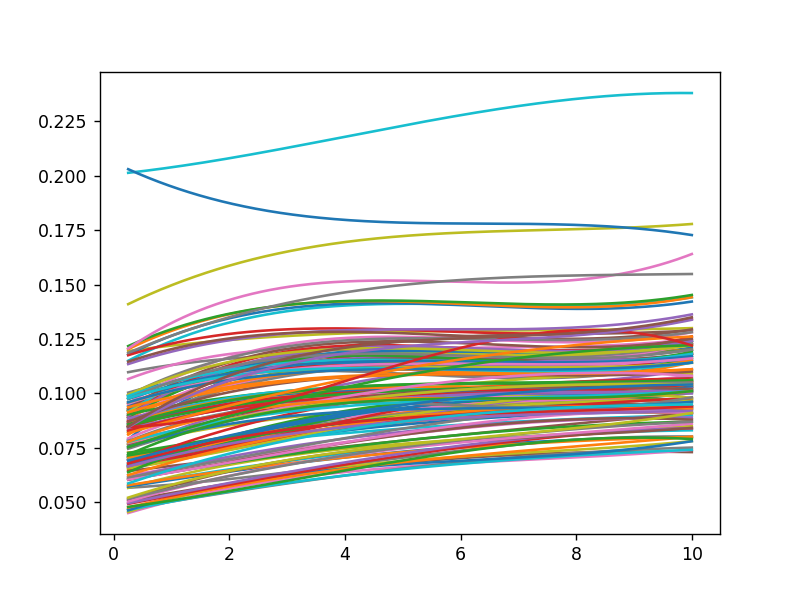

<IPython.core.display.Javascript object>


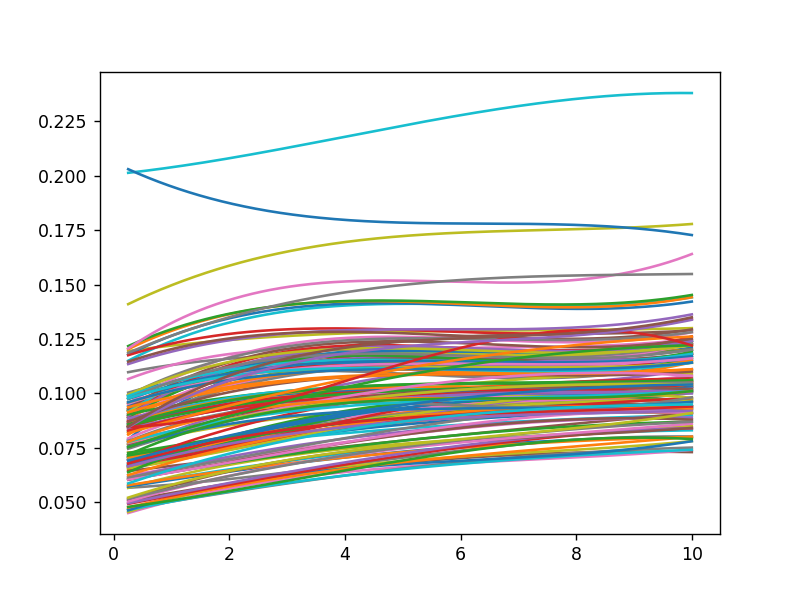

In [ ]:
fd_smooth_basis_4 = fd_ori.to_basis(basis.BSplineBasis(n_basis=4)) ## basis of functions. $$ f(t) = \sum_{i=1}^N a_i \phi_i(t) $$

fd_smooth_basis_4.plot()

<IPython.core.display.Javascript object>


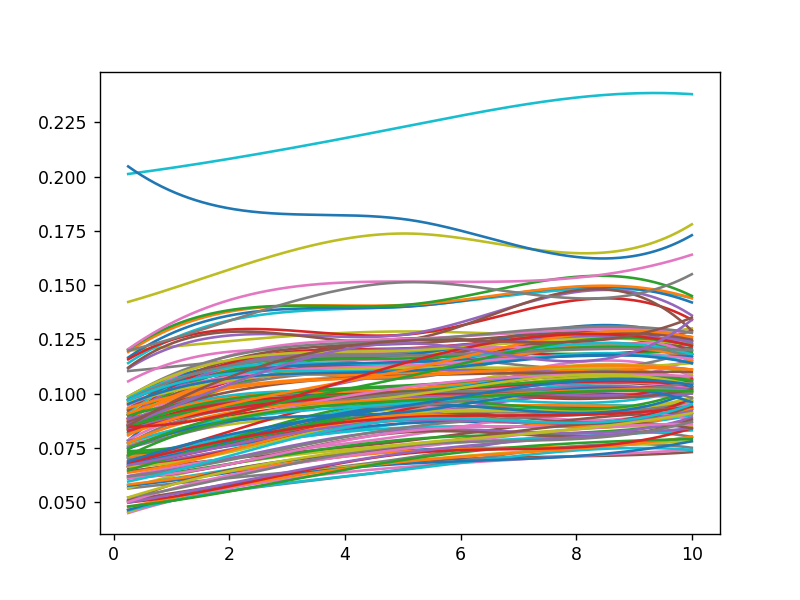

<IPython.core.display.Javascript object>


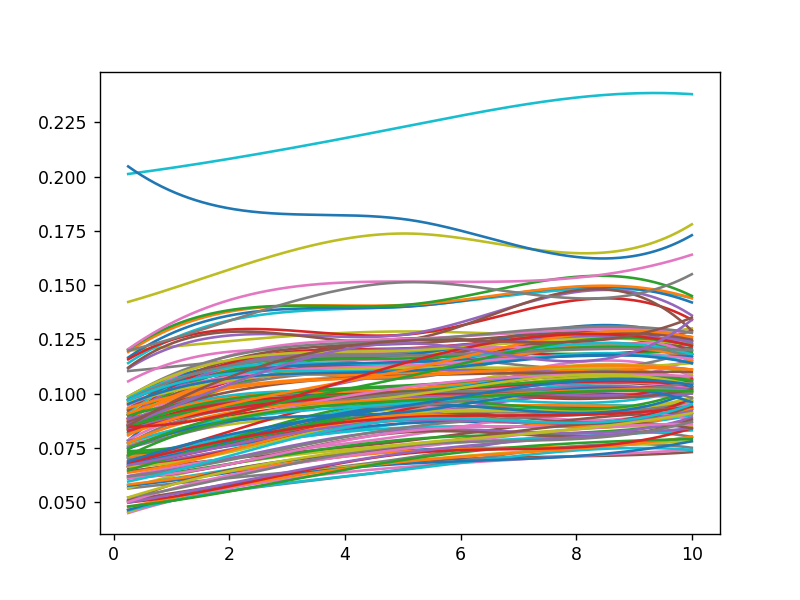

In [ ]:
fd_smooth_basis_5 = fd_ori.to_basis(basis.BSplineBasis(n_basis=5)) ## basis of functions. $$ f(t) = \sum_{i=1}^N a_i \phi_i(t) $$

fd_smooth_basis_5.plot()

<IPython.core.display.Javascript object>


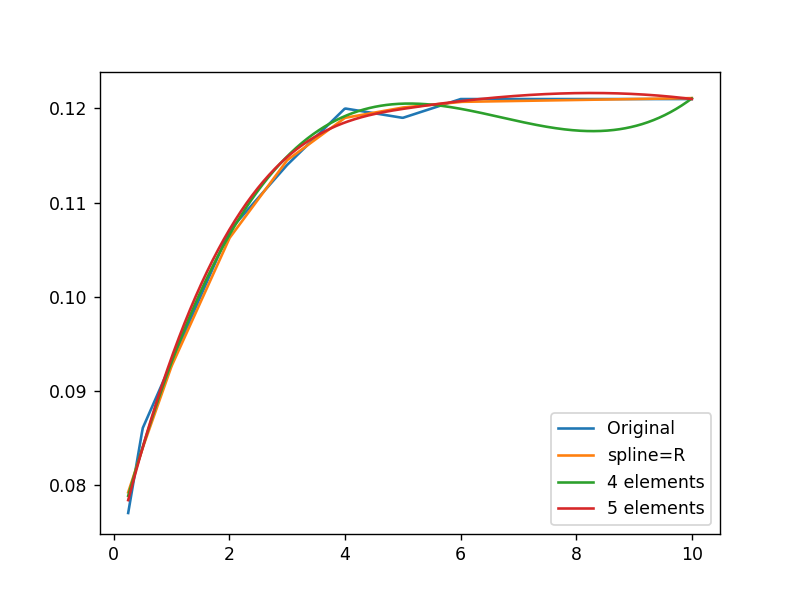

In [ ]:
fig = fd_ori[0].plot()
fd_smooth[0].plot(fig=fig)
fd_smooth_basis_4[0].plot(fig=fig)
fd_smooth_basis_5[0].plot(fig=fig)

fig.axes[0].legend(['Original','spline=R', '4 elements', '5 elements'])

In [ ]:
## We can also see the effect of changing the basis.
## For example, in the Fourier basis the functions start and end at the same points
## if the period is equal to the domain range, so this basis is clearly non suitable

In [ ]:
fd_basis_furier = fd_ori.to_basis(basis.FourierBasis(n_basis=4))

<IPython.core.display.Javascript object>


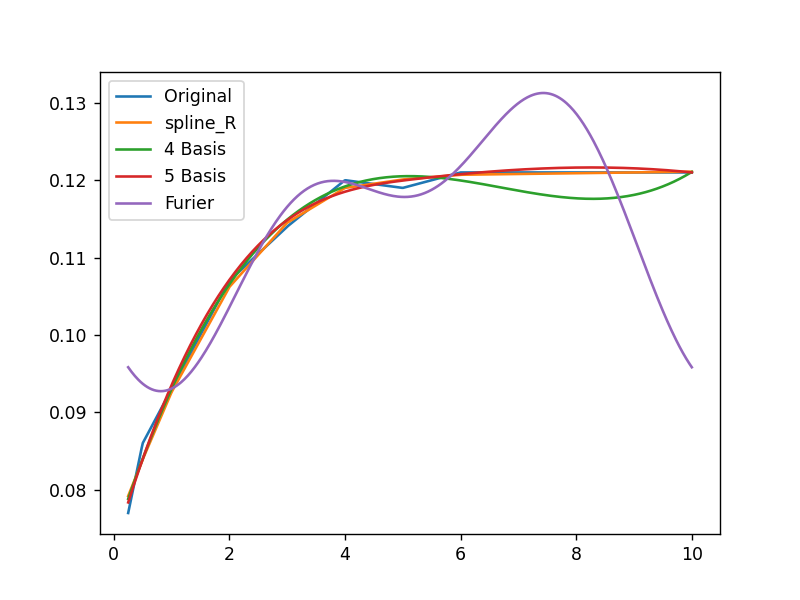

In [ ]:
fig = fd_ori[0].plot()
fd_smooth[0].plot(fig=fig)
fd_smooth_basis_4[0].plot(fig=fig)
fd_smooth_basis_5[0].plot(fig=fig)
fd_basis_furier[0].plot(fig=fig)
fig.axes[0].legend(['Original','spline_R', '4 Basis', '5 Basis', 'Furier'])

In [ ]:
mean_function = fd_smooth.mean() ## Compute the mean function

In [ ]:
## # Plot the mean function
plt.plot(mean_function.grid_points[0], mean_function.data_matrix[0])
plt.xlabel("Tenor")
plt.ylabel("Function Value")
plt.title("Mean Function")
plt.show()

<IPython.core.display.Javascript object>


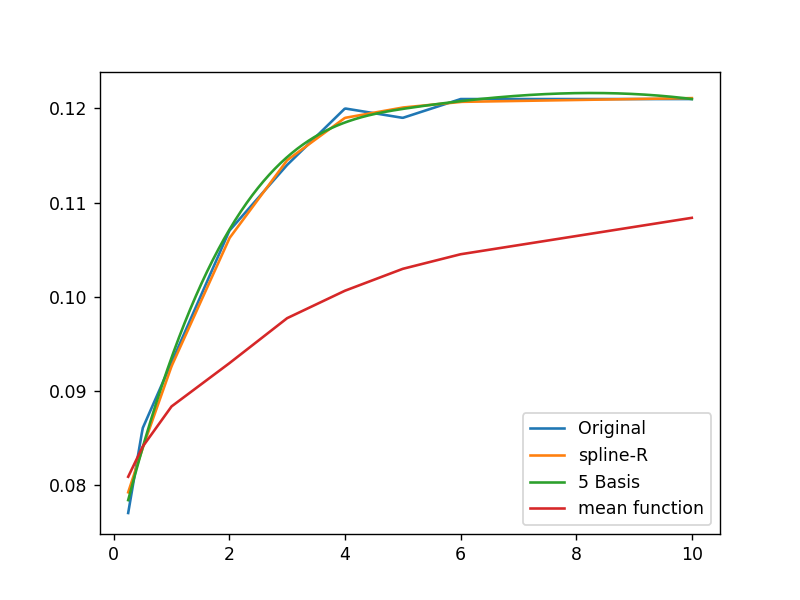

In [ ]:
fig = fd_ori[0].plot()
fd_smooth[0].plot(fig=fig)
fd_smooth_basis_5[0].plot(fig=fig)
plt.plot(mean_function.grid_points[0], mean_function.data_matrix[0])

fig.axes[0].legend(['Original','spline-R', '5 Basis', 'mean function'])

In [ ]:
variance_function = fd_smooth.var() ## Compute the variance function

<IPython.core.display.Javascript object>


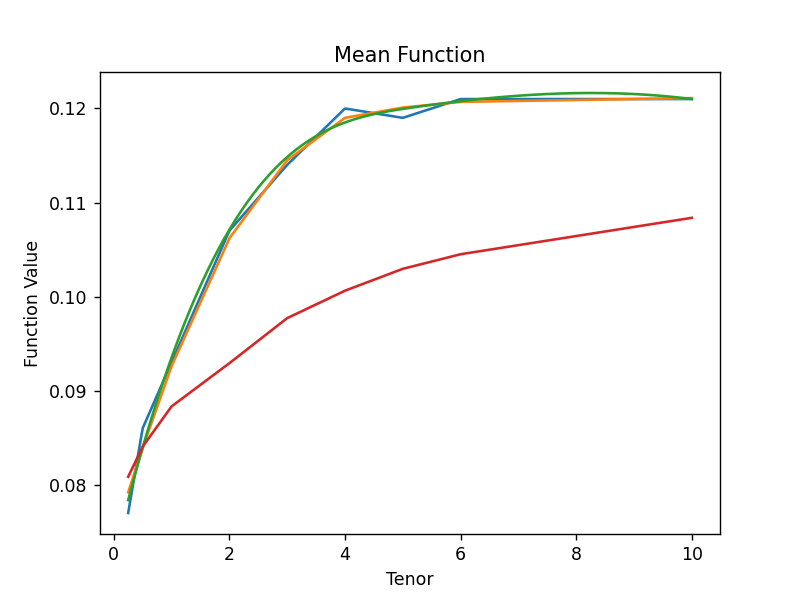

NameError: name 'mean_function' is not defined

In [ ]:
fig = fd_ori[0].plot()
fd_smooth[0].plot(fig=fig)
fd_smooth_basis_5[0].plot(fig=fig)
plt.plot(mean_function.grid_points[0], mean_function.data_matrix[0])
plt.plot(variance_function.grid_points[0], variance_function.data_matrix[0])

fig.axes[0].legend(['Original','spline-R', '5 Basis', 'mean function', 'variance fuction'])

In [ ]:
from skfda.preprocessing.registration import (
ElasticRegistration,
ShiftRegistration,
)

In [ ]:
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA

In [ ]:
## FPCA can be done in two ways.
## The first way is to operate directly with the raw data.
## We call it discretized FPCA as the functional data in this case consists in finite values dispersed over points in a domain range.
## We initialize and setup the FPCADiscretized object and run the fit method to obtain the first two components.

<IPython.core.display.Javascript object>


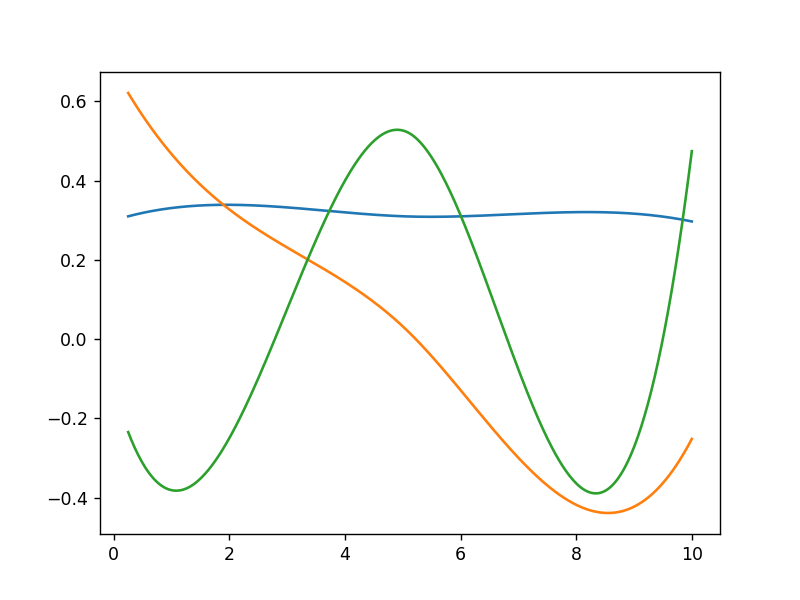

<IPython.core.display.Javascript object>


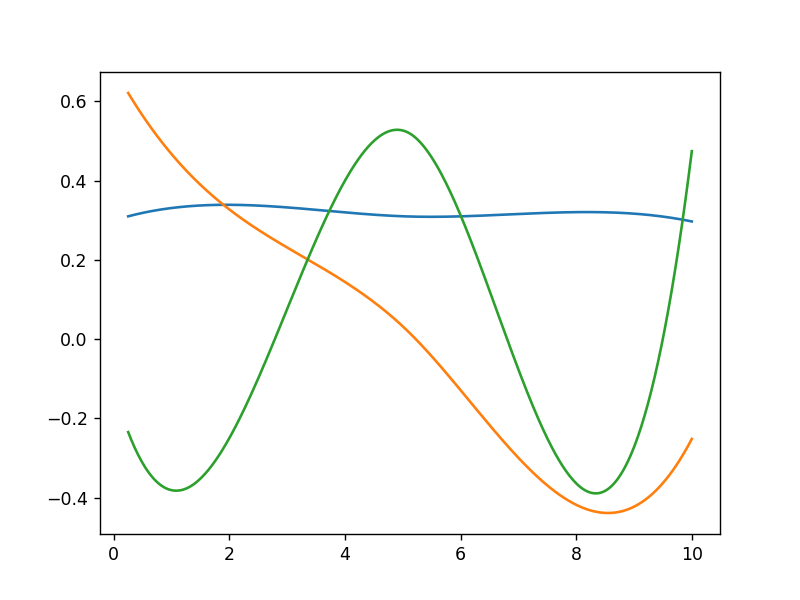

In [ ]:
fpca_discretized = FPCA(n_components=3)
fpca_discretized.fit(fd_smooth_basis_5)
fpca_discretized.components_.plot()

In [ ]:
## In the second case, the data is first converted to use a basis representation and the FPCA is done with the basis representation of the original data.
## We obtain the same dataset again and transform the data to a basis representation.
## This is because the FPCA module modifies the original data.

In [ ]:
fpca = skfda.preprocessing.dim_reduction.feature_extraction.FPCA(
n_components=2,
)
fpca.fit(fd_smooth_basis_5)

FPCA(n_components=2)

<IPython.core.display.Javascript object>


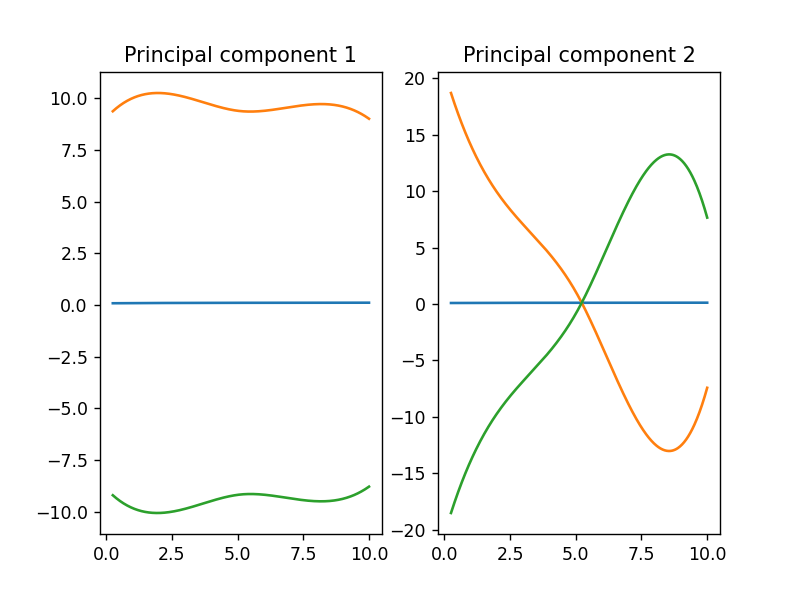

<IPython.core.display.Javascript object>


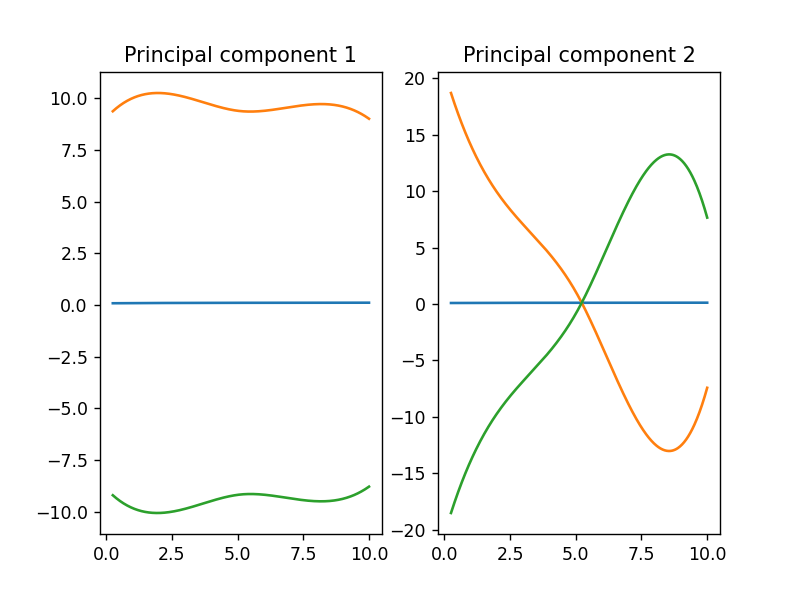

In [ ]:
skfda.exploratory.visualization.FPCAPlot(
    fd_smooth_basis_5, fpca.components_,multiple=30,).plot()

<IPython.core.display.Javascript object>


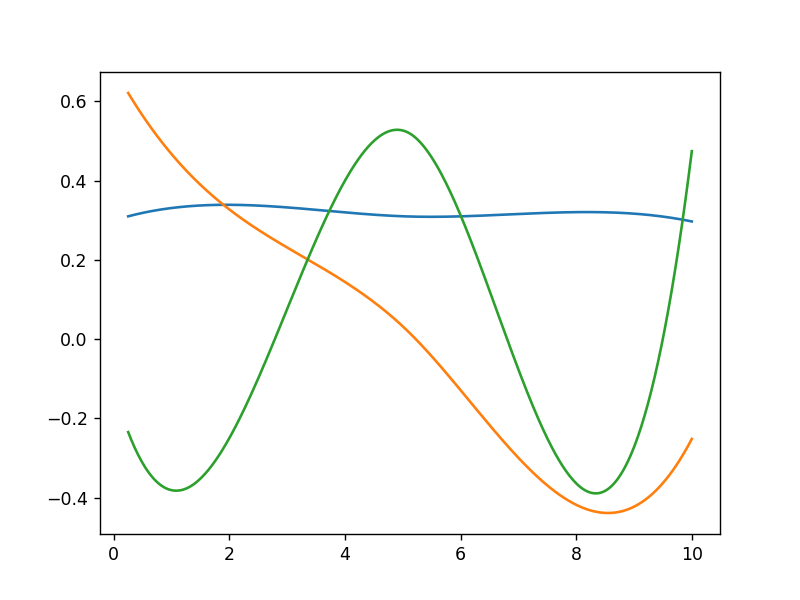

<IPython.core.display.Javascript object>


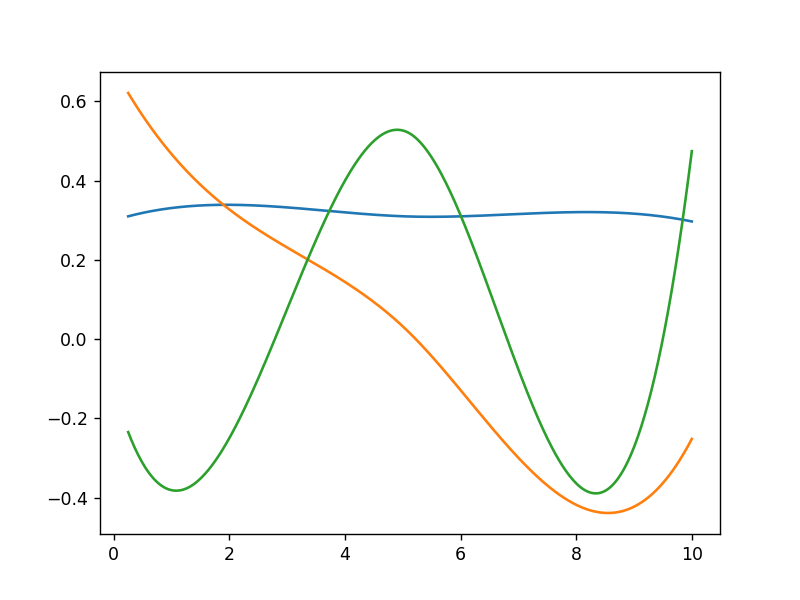

In [ ]:
fpca = FPCA(n_components=3)
fpca.fit(fd_smooth_basis_5)
fpca.components_.plot()

In [ ]:
explained_variance = fpca.explained_variance_ratio_
print("Explained Variance Ratios:")
for i, variance_ratio in enumerate(explained_variance):
    print(f"Component {i + 1}: {variance_ratio:.4f}")

Explained Variance Ratios:
Component 1: 0.9767
Component 2: 0.0148
Component 3: 0.0066


In [ ]:
singular_values = fpca.singular_values_
print("Singular Values:")
for i, sv in enumerate(singular_values):
    print(f"Component {i + 1}: {sv:.4f}")

Singular Values:
Component 1: 0.8713
Component 2: 0.1072
Component 3: 0.0716


In [ ]:
# To better illustrate the effects of the obtained two principal components, we add and subtract a multiple of the components to the mean function.
# We can then observe now that this principal component represents the variation

<IPython.core.display.Javascript object>


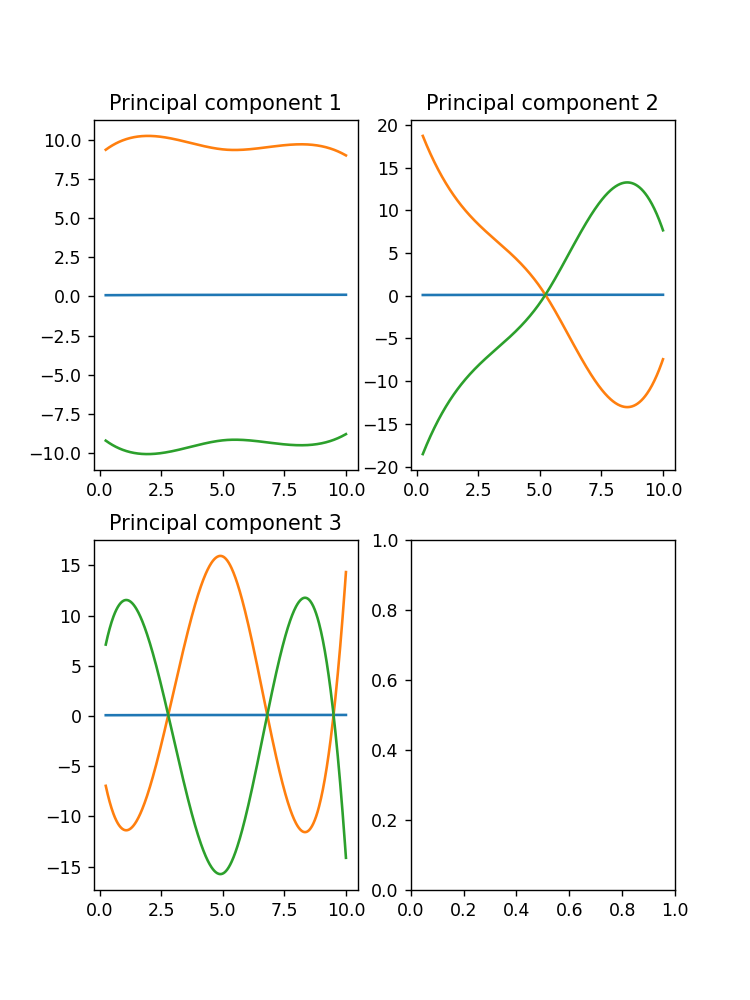

IndexError: index out of bounds

In [ ]:
FPCAPlot(
    fd_smooth_basis_5.mean(),
    fpca.components_,
    factor=30,
    fig=plt.figure(figsize=(6, 2 * 4)),
    n_rows=2,
).plot()

In [ ]:
## The dynamic Nelson–Siegel model (DNS) is given by(2)
## y t ( τ ) = X 1 t + X 2 t 1 − e − λ τ λ τ + X 3 t 1 − e − λ τ λ τ − e − λ τ + ϵ t ( τ )
## where X1t, X2t, and X3t can be interpreted as the time-varying level, slope, and curvature factors.

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
fpca.components_

FDataBasis(
    basis=BSplineBasis(domain_range=((0.25, 10.0),), n_basis=5, order=4, knots=(0.25, 5.125, 10.0)),
    coefficients=[[ 0.30969657  0.37198762  0.25954943  0.3456227   0.29671991]
     [ 0.62061405  0.2289404   0.26775121 -0.70535232 -0.25148337]
     [-0.23430574 -0.84868717  2.171352   -1.4209876   0.47405177]],
    dataset_name=None,
    argument_names=(None,),
    coordinate_names=(None,),
    extrapolation=None)

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
# Create a KernelPCA instance with chosen kernel
kernel_pca = KernelPCA(kernel='rbf', n_components=3)

In [ ]:
# Fit and transform the data
reduced_data = kernel_pca.fit_transform(fd_smooth_basis_5)

In [ ]:
from sklearn import cluster, datasets

<IPython.core.display.Javascript object>


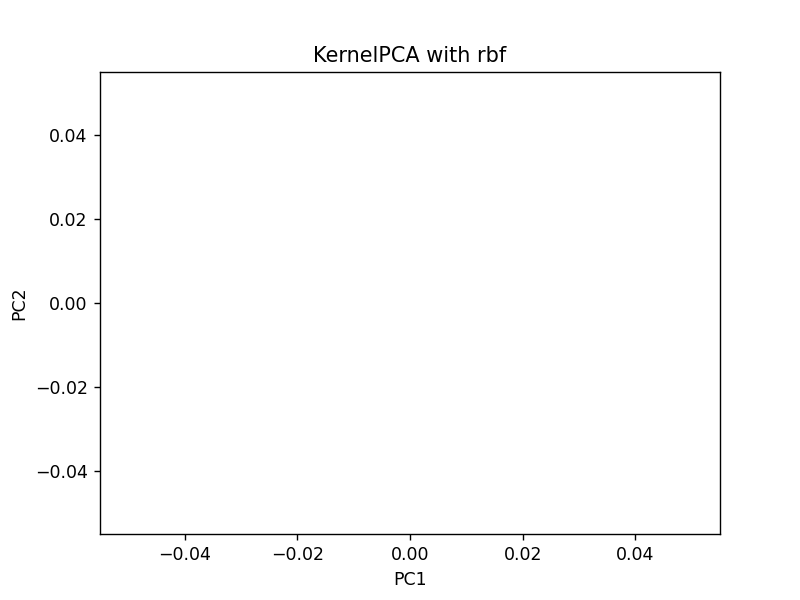

Text(0, 0.5, 'PC2')

In [ ]:
plt.figure()
plt.title("KernelPCA with rbf")
y=fpca
plt.scatter(reduced_data[y == 0, 0], reduced_data[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(reduced_data[y == 1, 0], reduced_data[y == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
from skfda.ml.regression import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(yiled_to_mat, fd_smooth_basis_5)

ValueError: Found input variables with inconsistent numbers of samples: [9, 151]